Necessary Packages and Classes

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import os

Making the dataset files

In [ ]:
!mkdir /content/mydataset
!mkdir /content/mydataset/train/
!mkdir /content/mydataset/valid/
!mkdir /content/mydataset/test/

In [ ]:
for i in range(80):
    with open(f'/content/mydataset/train/{str(i)}.txt','w', encoding='utf-8') as file:
        file.write(f'training file #{str(i)}')
for i in range(10):
    with open(f'/content/mydataset/valid/{str(i)}.txt', 'w', encoding='utf-8') as file:
        file.write(f'validation file #{str(i)}')
for i in range(10):
    with open(f'/content/mydataset/test/{str(i)}.txt', 'w', encoding='utf-8') as file:
        file.write(f'testing file #{str(i)}')

Loading it into a Dataset object recognizable by Pytorch

In [ ]:
class MyTextDataset(Dataset):
    def __init__(self, path):
        def sort_key(item):
            return int(item.replace('.txt',''))
            
        files_lst = os.listdir(path)
        files_lst = sorted([item for item in files_lst if item.endswith('.txt')], key=sort_key)
        self.texts = []
        for file_name in files_lst:
            with open(path+file_name, 'r') as file:
                file_content = file.read()
                self.texts.append(file_content)
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        original_item = self.texts[idx]
        tokens = original_item.split()
        length_lst = [len(token) for token in tokens]
        length_lst = length_lst[:20] if len(length_lst) >= 20 else length_lst + [0 for i in range(20-len(length_lst))]
        return torch.Tensor(length_lst)

In [ ]:
train_dataset = MyTextDataset('/content/mydataset/train/')

Working with the dataset

In [8]:
len(train_dataset)

80

In [9]:
train_dataset[54]

tensor([8., 4., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [12]:
for idx, batch in enumerate(iter(train_dataloader)):
    print(f'Batch {str(idx)} : {str(batch.size())}')

Batch 0 : torch.Size([32, 20])
Batch 1 : torch.Size([32, 20])
Batch 2 : torch.Size([16, 20])


MNIST Dataset

In [13]:
mnist_dataset = torchvision.datasets.MNIST('/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()
                             ]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /MNIST/raw/train-images-idx3-ubyte.gz to /MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /MNIST/raw/train-labels-idx1-ubyte.gz to /MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /MNIST/raw/t10k-images-idx3-ubyte.gz to /MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /MNIST/raw/t10k-labels-idx1-ubyte.gz to /MNIST/raw



In [14]:
mnist_dataloader = torch.utils.data.DataLoader(mnist_dataset, batch_size=64, shuffle=True)

In [15]:
len(mnist_dataset)

60000

In [16]:
mnist_dataset[50]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Showing what this data point contains

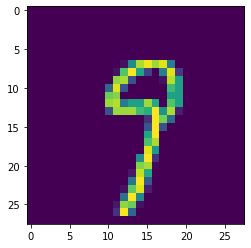

In [20]:
plt.imshow(mnist_dataset[1500][0].squeeze().numpy())

The shape of this data point

In [17]:
mnist_dataset[50][0].shape

torch.Size([1, 28, 28])

In [18]:
mnist_dataset[50][1]

3

What about the batches?

In [21]:
for idx, batch in enumerate(iter(mnist_dataloader)):
    print(f'Batch {str(idx)} : {batch[0].size()}')

Batch 0 : torch.Size([64, 1, 28, 28])
Batch 1 : torch.Size([64, 1, 28, 28])
Batch 2 : torch.Size([64, 1, 28, 28])
Batch 3 : torch.Size([64, 1, 28, 28])
Batch 4 : torch.Size([64, 1, 28, 28])
Batch 5 : torch.Size([64, 1, 28, 28])
Batch 6 : torch.Size([64, 1, 28, 28])
Batch 7 : torch.Size([64, 1, 28, 28])
Batch 8 : torch.Size([64, 1, 28, 28])
Batch 9 : torch.Size([64, 1, 28, 28])
Batch 10 : torch.Size([64, 1, 28, 28])
Batch 11 : torch.Size([64, 1, 28, 28])
Batch 12 : torch.Size([64, 1, 28, 28])
Batch 13 : torch.Size([64, 1, 28, 28])
Batch 14 : torch.Size([64, 1, 28, 28])
Batch 15 : torch.Size([64, 1, 28, 28])
Batch 16 : torch.Size([64, 1, 28, 28])
Batch 17 : torch.Size([64, 1, 28, 28])
Batch 18 : torch.Size([64, 1, 28, 28])
Batch 19 : torch.Size([64, 1, 28, 28])
Batch 20 : torch.Size([64, 1, 28, 28])
Batch 21 : torch.Size([64, 1, 28, 28])
Batch 22 : torch.Size([64, 1, 28, 28])
Batch 23 : torch.Size([64, 1, 28, 28])
Batch 24 : torch.Size([64, 1, 28, 28])
Batch 25 : torch.Size([64, 1, 28, 2

In [23]:
937*64+32

60000